<a href="https://colab.research.google.com/github/mintseok/MachineLearning/blob/main/Deep_Learning_From_Scratch_3/%EC%A0%9C4%EA%B3%A0%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 마운트

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
cd /content/drive/MyDrive/밑시딥3/deep-learning-from-scratch-3

/content/drive/MyDrive/밑시딥3/deep-learning-from-scratch-3


# 37. 텐서를 다루다

In [123]:
import numpy as np
import dezero.functions as F
from dezero import Variable

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.sin(x)
print(y)

variable([[ 0.84147098  0.90929743  0.14112001]
          [-0.7568025  -0.95892427 -0.2794155 ]])


In [124]:
x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
t = x+c
y = F.sum(t)

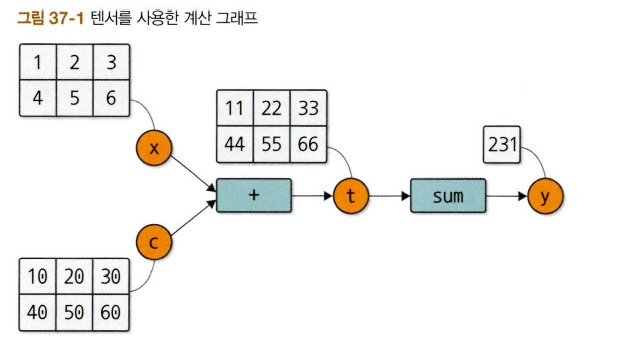

In [125]:
y.backward(retain_grad=True)
print(y.grad)
print(t.grad)
print(x.grad)
print(c.grad)

variable(1)
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


# 38. 형상 변환 함수

In [126]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.reshape(x, (6, ))
print(y)

[1 2 3 4 5 6]


In [127]:
# Reshape 클래스
from dezero.core import Function

class Reshape(Function):
  def __init__(self, shape):
    self.shape = shape

  def forward(self, x):
    self.x_shape = x.shape
    y = x.reshape(self.shape)
    return y

  def backward(self, gy):
    return reshape(gy, self.x_shape_)

In [128]:
from dezero.core import as_variable

def reshape(x, shape):
  if x.shape == shape:
    return as_variable(x)
  return Reshape(shape)(x)

In [129]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.reshape(x, (6,))
y.backward(retain_grad=True)
print(y.grad)
print(x.grad)

variable([1 1 1 1 1 1])
variable([[1 1 1]
          [1 1 1]])


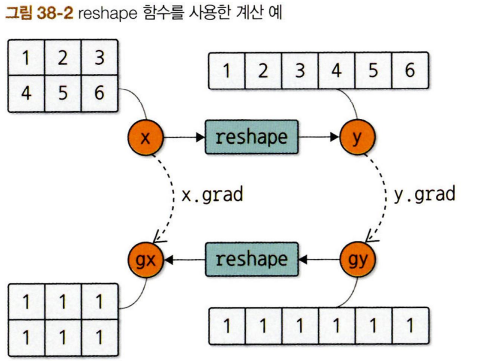

In [130]:
# in 클래스 Variable
#    def reshape(self, *shape):
#        if len(shape) == 1 and isinstance(shape[0], (tuple, list)):
#            shape = shape[0]
#        return dezero.functions.reshape(self, shape)
#
# def reshape 추가해줌 -> F.reshape 안 해줘도 됨

In [131]:
# transpose 만들어주기

x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.transpose(x)
print(y)

[[1 4]
 [2 5]
 [3 6]]


In [132]:
class Transpose(Function):
  def forward(self, x):
    y = np.transpose(x)
    return y

  def backward(self, gy):
    gx = transpose(gy)
    return gx

def transpose(x):
  return Transpose()(x)

In [133]:
# 클래스 Variable에 다음 추가
#def transpose(self, *axes):
#        if len(axes) == 0:
#            axes = None
#        elif len(axes) == 1:
#            if isinstance(axes[0], (tuple, list)) or axes[0] is None:
#                axes = axes[0]
#        return dezero.functions.transpose(self, axes)
#
#    [@property]
#    def T(self):
#        return dezero.functions.transpose(self)


In [134]:
x = Variable(np.random.rand(2, 3))
y = x.transpose()
y = x.T
print(y)

variable([[0.94737059 0.21331198]
          [0.73085581 0.51820071]
          [0.25394164 0.02566272]])


# 39. 합계 함수

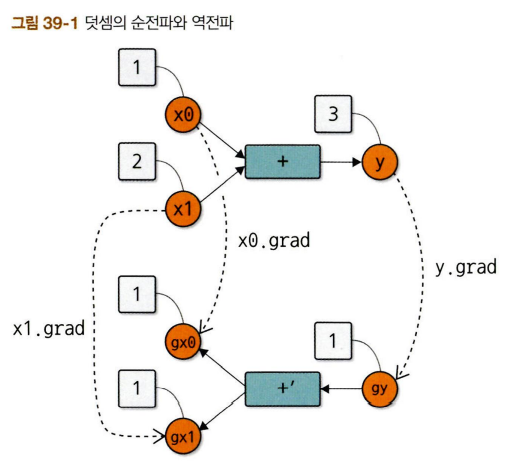

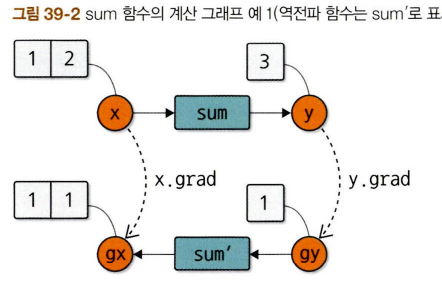

In [135]:
class Sum(Function):
  def forward(self, x):
    self.x_shape = x.shape
    y = x.sum()

  def backward(self, gy):
    gx = broadcast_to(gy, self.x_shape) # broadcast_to 는 40에서 다룰 예정
    return gx

def sum(x):
  return Sum()(x)

In [136]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([1, 2, 3, 4, 5, 6]))
y = F.sum(x)
y.backward()
print(y)
print(x.grad)

variable(21)
variable([1 1 1 1 1 1])


In [137]:
# axis and keepdims
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, axis=0)
print(y)
print(x.shape, ' -> ', y.shape)

[5 7 9]
(2, 3)  ->  (3,)


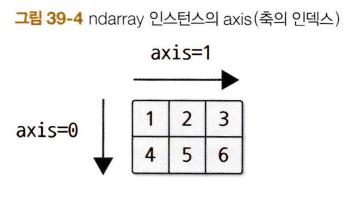

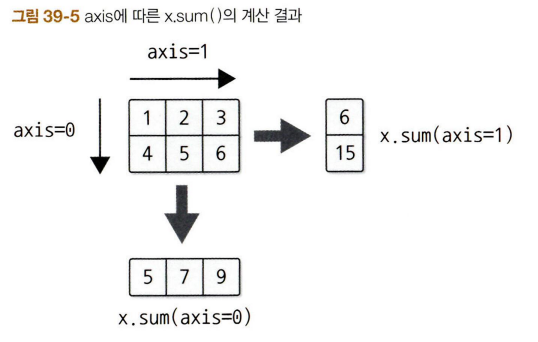

In [138]:
# keepdims
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.sum(x, keepdims=True) # keepdims=True -> 지정하면 축의 수가 유지된다.
print(y)
print(y.shape)

[[21]]
(1, 1)


In [139]:
# dezero/functions.py

class Sum(Function):
    def __init__(self, axis, keepdims):
        self.axis = axis
        self.keepdims = keepdims

    def forward(self, x):
        self.x_shape = x.shape
        y = x.sum(axis=self.axis, keepdims=self.keepdims)
        return y

    def backward(self, gy):
        gy = utils.reshape_sum_backward(gy, self.x_shape, self.axis,
                                        self.keepdims)
        gx = broadcast_to(gy, self.x_shape)
        return gx


def sum(x, axis=None, keepdims=False):
    return Sum(axis, keepdims)(x)

In [140]:
# 클래스 Variable에 다음 내용 추가
#
#def sum(self, axis=None, keepdims=False):
#        return dezero.functions.sum(self, axis, keepdims)

# 40. 브로드캐스트 함수

In [141]:
import numpy as np

x = np.array([1, 2, 3])
y = np.broadcast_to(x, (2, 3))
print(y)

[[1 2 3]
 [1 2 3]]


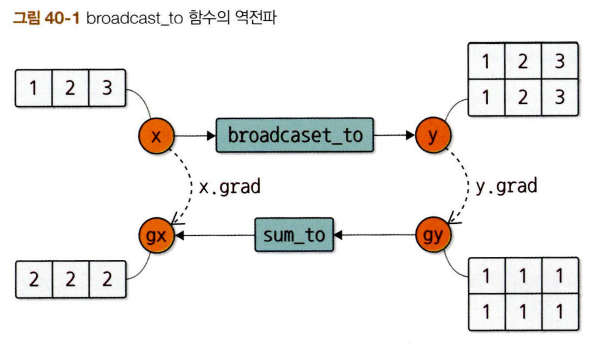

In [142]:
import numpy as np
from dezero.utils import sum_to
x = np.array([[1, 2, 3], [4, 5, 6]])
y = sum_to(x, (1, 3))
print(y)

y = sum_to(x, (2, 1))
print(y)

[[5 7 9]]
[[ 6]
 [15]]


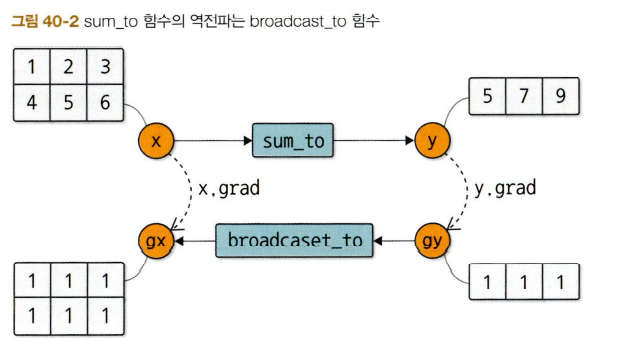

In [143]:
# dezero/functions.py
class BroadcastTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        xp = dezero.cuda.get_array_module(x)
        y = xp.broadcast_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = sum_to(gy, self.x_shape)
        return gx


def broadcast_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return BroadcastTo(shape)(x)


In [144]:
# dezero/functions.py
class SumTo(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = utils.sum_to(x, self.shape)
        return y

    def backward(self, gy):
        gx = broadcast_to(gy, self.x_shape)  ### 중요 ~
        return gx

def sum_to(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return SumTo(shape)(x)

In [145]:
x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))
y = x0 + x1
print(y)

variable([11 12 13])


In [146]:
# '브로드캐스트의 역전파는 아래의 backward에서 구현'
class Add(Function):
    def forward(self, x0, x1):
        self.x0_shape, self.x1_shape = x0.shape, x1.shape
        y = x0 + x1
        return y

    def backward(self, gy):
        gx0, gx1 = gy, gy
        if self.x0_shape != self.x1_shape:  # for broadcaset
            gx0 = dezero.functions.sum_to(gx0, self.x0_shape)
            gx1 = dezero.functions.sum_to(gx1, self.x1_shape)
        return gx0, gx1

In [147]:
x0 = Variable(np.array([1, 2, 3]))
x1 = Variable(np.array([10]))
y = x0 + x1
y.backward()
print(x0.grad)
print(x1.grad)

variable([1 1 1])
variable([3])


# 41. 행렬의 곱

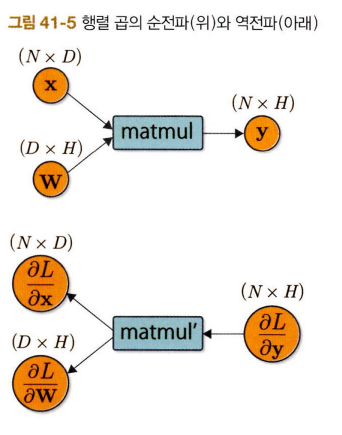

In [148]:
class MatMul(Function):
  def forward(self, x, W):
    y = x.dot(W)

  def backward(self, gy):
    x, W = self.inputs
    gx = matmul(gy, W.T)
    gW = matmul(x.T, gy)
    return gx, gW

def matmul(x, W):
  return MatMul()(x, W)

In [149]:
from dezero import Variable
import dezero.functions as F

x = Variable(np.random.randn(2, 3))
W = Variable(np.random.randn(3, 4))
y = F.matmul(x, W)
y.backward()

print(x.grad.shape)
print(W.grad.shape)

(2, 3)
(3, 4)


# 42. 선형 회귀

In [161]:
import numpy as np

np.random.seed(0) # 시드값 고정
x = np.random.rand(100, 1) # 100 x 1 shape
y = 5 + 2 * x + np.random.rand(100, 1) # y에 무작위 노이즈 추가

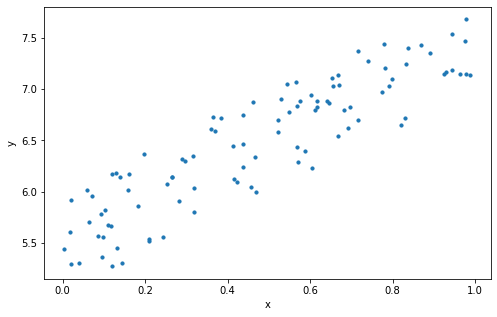

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y, s=10)

In [163]:
import numpy as np
from dezero import Variable
import dezero.functions as F

# 토이 데이터셋
np.random.seed(0) # 시드값 고정
x = np.random.rand(100, 1) # 100 x 1 shape
y = 5 + 2 * x + np.random.rand(100, 1) # y에 무작위 노이즈 추가
x, y = Variable(x), Variable(y)

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))

def predict(x):
  y = F.matmul(x, W) + b
  return y

In [164]:
def mean_squared_error(x0, x1):
  diff = x0 - x1
  return F.sum(diff ** 2) / len(diff) # return 값은 스칼라

lr = 0.1
iters = 100

for i in range(iters):
  y_pred = predict(x)
  loss = mean_squared_error(y, y_pred)

  W.cleargrad()
  b.cleargrad()
  loss.backward()

  W.data -= lr * W.grad.data
  b.data -= lr * b.grad.data
print(W, b, loss)

variable([[2.11807369]]) variable([5.46608905]) variable(0.07908606512411756)


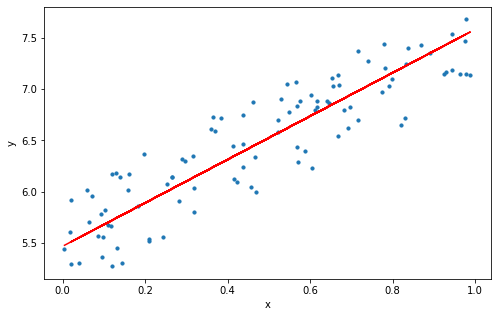

In [167]:
import matplotlib.pyplot as plt
np.random.seed(0) # 시드값 고정
x = np.random.rand(100, 1) # 100 x 1 shape
y = 5 + 2 * x + np.random.rand(100, 1) # y에 무작위 노이즈 추가

plt.figure(figsize=(8, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x, y, s=10)
plt.plot(x, predict(x).data, 'r') # Variable은 plot이 안 되더라

In [168]:
# mean_squared_error의 보충 version
class MeanSquaredError(Function):
    def forward(self, x0, x1):
        diff = x0 - x1
        y = (diff ** 2).sum() / len(diff)
        return y

    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        gx0 = gy * diff * (2. / len(diff))
        gx1 = -gx0
        return gx0, gx1


def mean_squared_error(x0, x1): # 선언 시 데이터 덜 사용하게 됨
    return MeanSquaredError()(x0, x1)

# 43. 신경망

In [169]:
def linear_simple(x, W, b=None):
  t = matmul(x, W)
  if b is None:
    return t

  y = t + b
  t.data = None
  return y

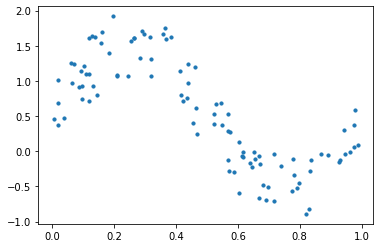

In [170]:
# 비선형 데이터
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1) # 데이터 생성에 sin 함수 사용..

plt.scatter(x, y, s=10)

In [171]:
# 비선형 데이터를 선형 회귀로는 풀기란 불가능 => 비선형 함수가 필요 -> 활성화 함수
def sigmoid_simple(x):
  x = as_variable(x) # x가 Variable일때 Variable(Variable())을 피하기 위해 as_variable 사용
  y = 1 / (1 + exp(-x))
  return y

variable(0.8473695850105871)
variable(0.25142862851836056)
variable(0.2475948546674987)
variable(0.23786120447054818)
variable(0.2122223133310294)
variable(0.16742181117834176)
variable(0.09681932619992668)
variable(0.07849528290602334)
variable(0.07749729552991153)
variable(0.07722132399559316)


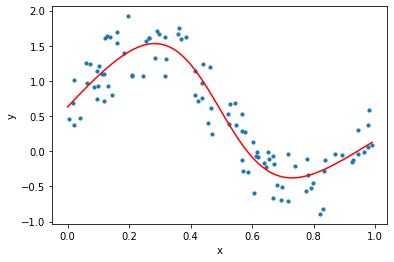

In [172]:
# steps/steps43.py
# 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# 가중치 초기화
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

# 신경망 추론
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y


lr = 0.2
iters = 10000

# 신경망 학습
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0:
        print(loss)


# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()

# 44. 매개변수를 모아두는 계층

In [173]:
class Parameter(Variable):
  pass

In [174]:
import numpy as np
from dezero import Variable, Parameter

x = Variable(np.array(1.0))
p = Parameter(np.array(2.0))
y = x * p

print(isinstance(p, Parameter))
print(isinstance(x, Parameter))
print(isinstance(y, Parameter))

True
False
False


In [189]:
from dezero.core import Parameter
import weakref

class Layer:
  def __init__(self):
    self._params = set()

  def __setattr__(self, name, value):
    if isinstance(value, (Parameter, Layer)):
      self._params.add(name)
    super().__setattr__(name, value)

  def __call___(self, *inputs):
    outputs = self.forward(*inputs)
    if not isinstance(outputs, tuple):
      outputs = (outputs,)
    self.inputs = [weakref.ref(x) for x in inputs]
    self.outputs = [weakref.ref(x) for y in outputs]
    return outputs if len(outputs) > 1 else outputs[0]

  def forward(self, inputs):
    raise NotImplementedError()
  
  def params(self):
    for name in self._params:
      obj = self.__dict__[name]

      if isinstance(obj, Layer): # Layer에서 매개변수 꺼내기
        yield from obj.params()

      else:
        yield obj

  def cleargrads(self):
    for param in self.params():
      param.cleargrad()


In [181]:
layer = Layer()

layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Variable(np.array(3))
layer.p4 = 'test'

print(layer._params)
print('------------')

for name in layer._params:
  print(name, layer.__dict__[name])

{'p2', 'p1'}
------------
p2 variable(2)
p1 variable(1)


In [183]:
# Linear 클래스 구현
# dezero/layers.py

class Linear(Layer):
    def __init__(self, out_size, nobias=False, dtype=np.float32, in_size=None):
        super().__init__()
        self.in_size = in_size
        self.out_size = out_size
        self.dtype = dtype

        self.W = Parameter(None, name='W')
        if self.in_size is not None:
            self._init_W()

        if nobias:
            self.b = None
        else:
            self.b = Parameter(np.zeros(out_size, dtype=dtype), name='b')

    def _init_W(self, xp=np):
        I, O = self.in_size, self.out_size
        W_data = xp.random.randn(I, O).astype(self.dtype) * np.sqrt(1 / I)
        self.W.data = W_data

    def forward(self, x):
        if self.W.data is None:
            self.in_size = x.shape[1]
            xp = cuda.get_array_module(x)
            self._init_W(xp)

        y = F.linear(x, self.W, self.b)
        return y

In [185]:
# super() 메서드 이해 예시 코드
class Person:
    def __init__(self):
        print('Person __init__')
        self.hello = '안녕하세요.'
 
class Student(Person):
    def __init__(self):
        print('Student __init__')
        super().__init__()                # super()로 기반 클래스의 __init__ 메서드 호출 -> 여기서는 Person의 __init__ 호출
        self.school = '파이썬 코딩 도장'
 
james = Student()
print(james.school)
print(james.hello)

Student __init__
Person __init__
파이썬 코딩 도장
안녕하세요.


In [188]:
#steps/step44.py

import numpy as np
import dezero.functions as F
import dezero.layers as L


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10)
l2 = L.Linear(1)

# 예측 함수 (모델)
def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y


lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185571)


# 45. 계층을 모아두는 계층

In [190]:
import dezero.layers as L
import dezero.functions as F
from dezero  import Layer

model = Layer()
model.l1 = L.Linear(5)
model.l2 = L.Linear(3)

# 추론을 수행하는 함수
def predict(model, x):
  y = model.l1(x)
  y = F.sigmoid(y)
  y = model.l2(y)
  return y

# 모든 매개변수에 접근
for p in model.params():
  print(p)

# 모든 매개변수의 기울기를 재설정
model.cleargrads()

variable([0. 0. 0. 0. 0.])
variable(None)
variable([0. 0. 0.])
variable(None)


In [191]:
class TwoLayerNet(Layer):
  def __init__(self, hidden_size, out_size):
    super().__init__()
    self.l1 = L.Linear(hidden_size)
    self.l2 = L.Linear(out_size)

  def forward(self, x):
    y = F.sigmoid(self.l1(x))
    y = self.l2(y)
    return y

In [192]:
# dezero/models.py

from dezero import Layer, utils

class Model(Layer):
  def plot(self, *inputs, to_file='model.png'):
    y = self.forward(*inputs)
    return utils.plot_dot_graph(y, verbose=True, to_file=to_file)

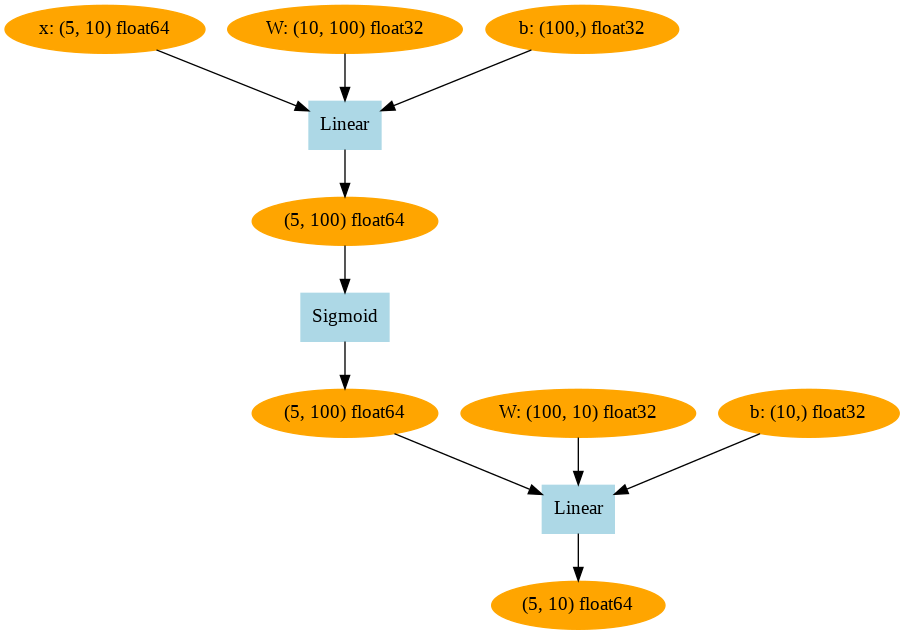

In [194]:
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
  def __init__(self, hidden_size, out_size):
    super().__init__()
    self.l1 = L.Linear(hidden_size)
    self.l2 = L.Linear(out_size)

  def forward(self, x):
    y = F.sigmoid(self.l1(x))
    y = self.l2(y)
    return y

x = Variable(np.random.randn(5, 10), name='x')
model = TwoLayerNet(100, 10)
model.plot(x)

In [196]:
import numpy as np
from dezero import Model
import dezero.layers as L
import dezero.functions as F

# 데이터셋 생성
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

#  하이퍼파라미터 설정
lr = 0.2
max_iter = 10000
hidden_size = 10

# 모델 정의
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


model = TwoLayerNet(hidden_size, 1)

# 학습 시작
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185571)


In [199]:
# dezero/models.py
# multi-layer perceptron

class MLP(Model):
    def __init__(self, fc_output_sizes, activation=F.sigmoid):
        super().__init__()
        self.activation = activation
        self.layers = []

        for i, out_size in enumerate(fc_output_sizes):
            layer = L.Linear(out_size)
            setattr(self, 'l' + str(i), layer)
            self.layers.append(layer)

    def forward(self, x):
        for l in self.layers[:-1]:
            x = self.activation(l(x))
        return self.layers[-1](x)

# 사용 방법
# model = MLP((10, 1)) # 2층
# model = MLP((10, 20, 30, 40, 1)) # 5층

# 46. Optimizer로 수행하는 매개변수 갱신

In [201]:
# dezero/optimizers.py

class Optimizer:
    def __init__(self):
        self.target = None
        self.hooks = []

    def setup(self, target):
        self.target = target
        return self

    def update(self):
        # None 이외의 매개변수를 리스트에 모아둠
        params = [p for p in self.target.params() if p.grad is not None]

        # 전처리 옵션
        for f in self.hooks:
            f(params)
        # 매개변수 갱신
        for param in params:
            self.update_one(param)

    def update_one(self, param):
        raise NotImplementedError()

    def add_hook(self, f):
        self.hooks.append(f)

In [203]:
# dezero/optimizers.py
# SGD Stochastic Gradient Descent -> 확률적경사하강법
#                                    '확률적'은 대상 데이터 중에서 무작위로 선별한 데이터에 대해 경사하강법 수행
class SGD(Optimizer):
    def __init__(self, lr=0.01):
        super().__init__()
        self.lr = lr

    def update_one(self, param):
        param.data -= self.lr * param.grad.data

In [204]:
import numpy as np
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr).setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355149)
variable(0.07655073683421637)
variable(0.0763780308623822)
variable(0.07618764131185571)


In [206]:
# Momemtum 구현
class MomentumSGD(Optimizer):
    def __init__(self, lr=0.01, momentum=0.9):
        super().__init__()
        self.lr = lr
        self.momentum = momentum
        self.vs = {}

    def update_one(self, param):
        v_key = id(param)
        if v_key not in self.vs:
            xp = cuda.get_array_module(param.data)
            self.vs[v_key] = xp.zeros_like(param.data)

        v = self.vs[v_key]
        v *= self.momentum
        v -= self.lr * param.grad.data
        param.data += v

# 47. 소프트맥스 함수와 교차 엔트로피 오차

In [208]:
# 슬라이스 조작 함수 -> get_items()란 함수
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1, 2, 3], [4, 5, 6]]))
y = F.get_item(x, 1)
print(y)

variable([4 5 6])


In [209]:
y.backward()
print(x.grad)

variable([[0 0 0]
          [1 1 1]])


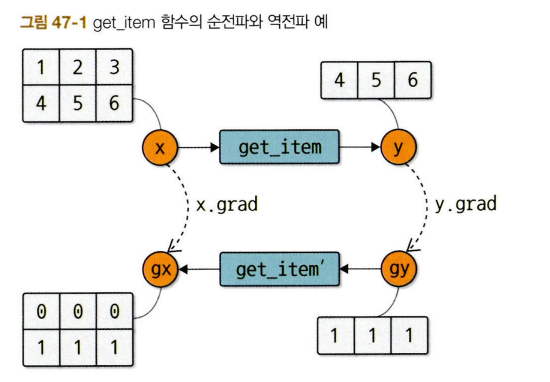